In [1]:
from module.EmbeddedAttackModel import *
from module.utils import * 
from module.gs_mim import GradSmoothMomentumIterativeMethod
from cleverhans.attacks import MomentumIterativeMethod
%matplotlib inline
import numpy as np

batch_shape = (110, 299, 299, 3)
datag = dev_data_generater(batch_shape=batch_shape)
_, X,Y = next(datag)

Using TensorFlow backend.


In [2]:
# batch_shape = (10, 299, 299, 3)
# datag = dev_data_generater(batch_shape=batch_shape)
# name = 'vgg_16'
# T1 = TargetModel(batch_shape, 110, name=name)
# PredictBatch(T1, datag)

In [3]:
name = 'inception_v1'
T1 = TargetModel(batch_shape, 110, name=name)
name = 'resnetv1_50'
T2 = TargetModel(batch_shape, 110, name=name)
name = 'vgg_16'
T3 = TargetModel(batch_shape, 110, name=name)

{'ep_ratio': 0.2, 'nb_iter': 10, 'eps': 51.0, 'eps_iter': 5.1, 'y': <tf.Tensor 'output:0' shape=(?, 110) dtype=float32>, 'clip_min': 0, 'clip_max': 255}


C:\Projects\Develop\IJCAI2019\IJCAI19_AliAAAC\module\gs_mim.py:204: UserWarning: kwargs is unused and will be removed on or after 2019-04-26.
  warnings.warn("kwargs is unused and will be removed on or after "


INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
Attack  runs: 50.85 s
batchs 4 L2 34.15136543871647
GPU status 1280
INFO:tensorflow:Restoring parameters from ../official_data/model/vgg_16/vgg_16.ckpt
Predict  runs: 12.05 s
batchs 11 Accuracy 0.018181818452748386


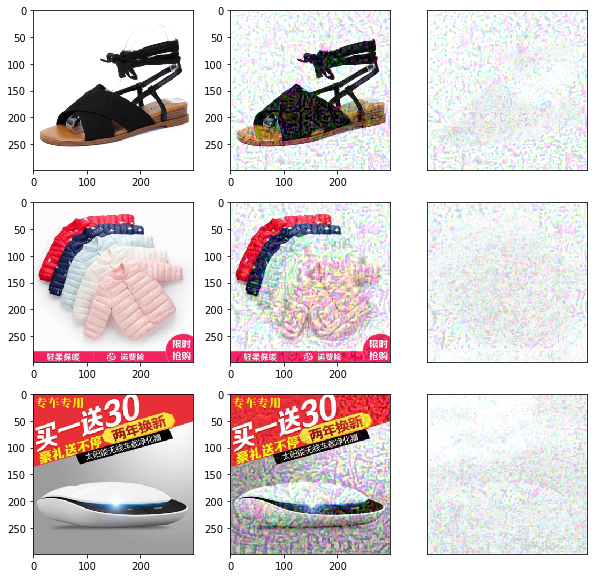

In [4]:
A = EmbeddedAttackModel(batch_shape, 110)
A.add_model(T1)
# A.add_model(T2)
# A.add_model(T3)

batch_shape = (30, 299, 299, 3)
datag = dev_data_generater(batch_shape=batch_shape)
attack_params = {"ep_ratio":0.2, "nb_iter":10}
# Xadv = AttackHelper(A, X, Y, MomentumIterativeMethod, attack_params)
# Xadv = AttackHelper(A, X, Y, GradSmoothMomentumIterativeMethod, attack_params)
Xadv = AttackBatch(A, datag, GradSmoothMomentumIterativeMethod, attack_params, max_iter=None)

batch_shape = (10, 299, 299, 3)
datag = mem_data_generater(Xadv, Y, batch_shape=batch_shape)
PredictBatch(T3, datag)
plot_images(X, Xadv, n=3)